# Gun Violence EDA — Participants (2014–2024)

This notebook loads all cleaned participant CSVs from `Participants` folder, combines them, runs structural checks, explores gender and age group distributions, and saves a combined gzipped CSV for later cross-analysis with the incidents dataset.

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

PARTICIPANTS_DIR = Path('/Users/johnnybae/Documents/Academia/Chaminade/DS495 - Research/Participants')

In [2]:
# read all cleaned files
cleaned_files = sorted(PARTICIPANTS_DIR.glob('*_clean.csv'))
if not cleaned_files:
    raise FileNotFoundError('No cleaned participant files found in the folder')

dfs = []
for file in cleaned_files:
    df = pd.read_csv(file, low_memory=False)
    df['Source_File'] = file.name
    dfs.append(df)

parts = pd.concat(dfs, ignore_index=True)
print(f'[OK] Combined {len(cleaned_files)} files → {len(parts):,} total rows\n')
parts.head()

[OK] Combined 11 files → 803,861 total rows



,ID,Date,State,City,Gender,Age Group,Source_File
0,3040722.0,31-Dec-14,California,Los Angeles,male,Adult 18+,participants_2014_clean.csv
1,3040717.0,31-Dec-14,California,Los Angeles,male,Adult 18+,participants_2014_clean.csv
2,291511.0,31-Dec-14,Virginia,Petersburg,male,Adult 18+,participants_2014_clean.csv
3,291511.0,31-Dec-14,Virginia,Petersburg,male,Adult 18+,participants_2014_clean.csv
4,291511.0,31-Dec-14,Virginia,Petersburg,male,Adult 18+,participants_2014_clean.csv


In [3]:
print('Columns:', list(parts.columns))
parts.info()
parts.isna().sum()

Columns: ['ID', 'Date', 'State', 'City', 'Gender', 'Age Group', 'Source_File']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803861 entries, 0 to 803860
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           766057 non-null  float64
 1   Date         766057 non-null  object 
 2   State        766057 non-null  object 
 3   City         764791 non-null  object 
 4   Gender       685927 non-null  object 
 5   Age Group    675252 non-null  object 
 6   Source_File  803861 non-null  object 
dtypes: float64(1), object(6)
memory usage: 42.9+ MB


ID              37804
Date            37804
State           37804
City            39070
Gender         117934
Age Group      128609
Source_File         0
dtype: int64

In [4]:
# basic distributions
if 'Gender' in parts.columns:
    print('\nGender distribution:')
    print(parts['Gender'].value_counts(dropna=False).head(10))

if 'Age Group' in parts.columns:
    print('\nAge Group distribution:')
    print(parts['Age Group'].value_counts(dropna=False).head(10))


Gender distribution:
Gender
male      593695
NaN       117934
female     92232
Name: count, dtype: int64

Age Group distribution:
Age Group
Adult 18+     605529
NaN           128609
Teen 12-17     59925
Child 0-11      9798
Name: count, dtype: int64


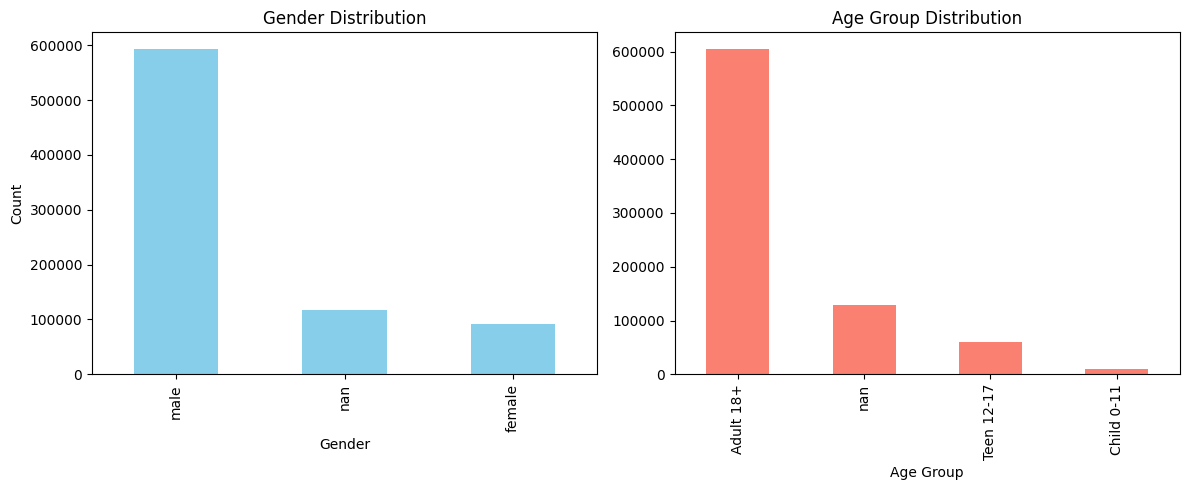

In [5]:
# plot gender and age group distributions
fig, axes = plt.subplots(1, 2, figsize=(12,5))
if 'Gender' in parts.columns:
    parts['Gender'].value_counts(dropna=False).head(8).plot(kind='bar', ax=axes[0], color='skyblue')
    axes[0].set_title('Gender Distribution')
    axes[0].set_ylabel('Count')
if 'Age Group' in parts.columns:
    parts['Age Group'].value_counts(dropna=False).head(8).plot(kind='bar', ax=axes[1], color='salmon')
    axes[1].set_title('Age Group Distribution')
plt.tight_layout()
plt.show()

State
Illinois          64207
Texas             59107
California        52227
Florida           41306
Pennsylvania      35014
Ohio              34361
Georgia           30976
North Carolina    30767
Louisiana         29305
New York          28308
Name: count, dtype: int64


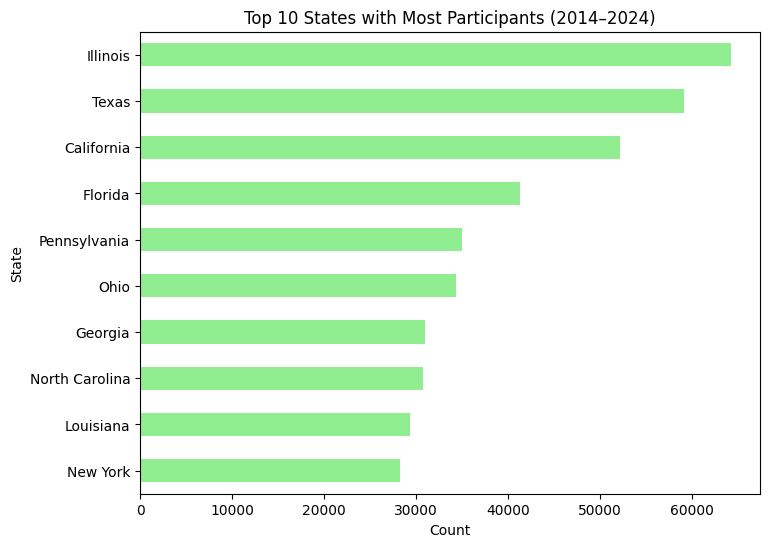

In [11]:
# top 10 states (if available)
if 'State' in parts.columns:
    top_states = parts['State'].value_counts().head(10)
    print(top_states)
    top_states.plot(kind='barh', figsize=(8,6), color='lightgreen')
    plt.title('Top 10 States with Most Participants (2014–2024)')
    plt.xlabel('Count')
    plt.gca().invert_yaxis()
    plt.show()

In [12]:
# save combined dataset for later analysis
out_path = PARTICIPANTS_DIR / 'participants_all_years.csv.gz'
parts.to_csv(out_path, index=False, compression='gzip')
print(f'\n[Saved combined file] {out_path}')


[Saved combined file] /Users/johnnybae/Documents/Academia/Chaminade/DS495 - Research/Participants/participants_all_years.csv.gz
